Paso 1: Importar las bibliotecas
Empecemos importando las bibliotecas necesarias para cargar y analizar los datos, así como para visualizar los resultados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Paso 2: Cargar los datos
Carguemos los archivos "DirectMarketing.csv" y "Groceries.csv" en DataFrames de pandas.

In [2]:
df1 = pd.read_csv("DirectMarketing.csv")
df2 = pd.read_csv("Groceries_dataset.csv")

Paso 3: Análisis y visualización de los datos

A continuación, realizaremos el análisis y la visualización de los datos para responder a las preguntas planteadas.

Pregunta 1: Distribución porcentual por edad, género y estado civil de los compradores según el archivo Marketing.csv

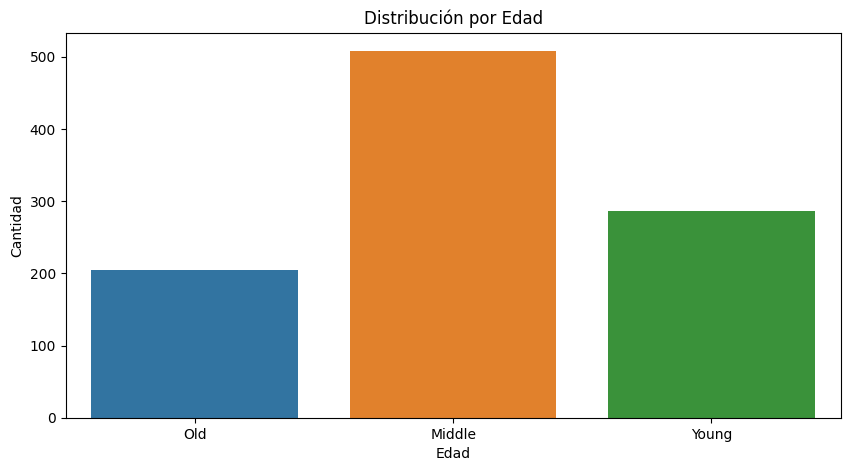

In [3]:
# Gráfico de distribución por edad
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x="Age")
plt.title("Distribución por Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()



Como podemos observar, las personas de la mediana edad representa la mayoria de los compradores

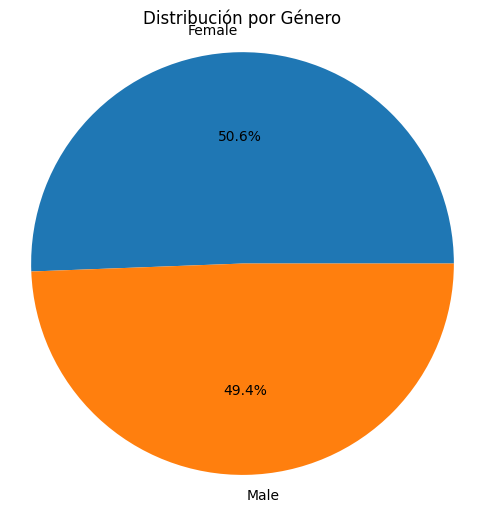

In [4]:
# Gráfico de distribución por género
plt.figure(figsize=(6, 6))
df1["Gender"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Distribución por Género")
plt.ylabel("")
plt.axis("equal")

plt.show()

La distribucion por genero es muy parecida en ambos.

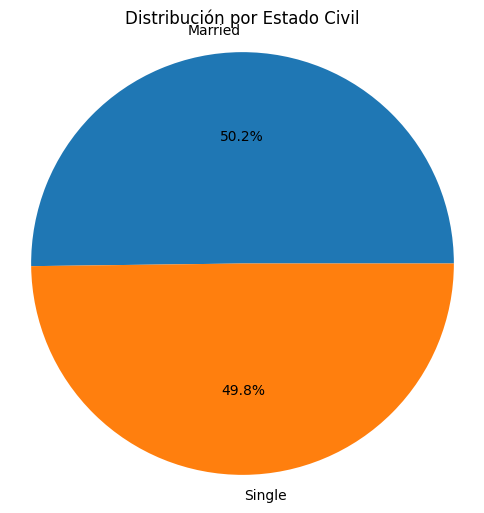

In [5]:
# Gráfico de distribución por estado civil
plt.figure(figsize=(6, 6))
df1["Married"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Distribución por Estado Civil")
plt.ylabel("")
plt.axis("equal")
plt.show()

La distribucion por estado civil tambien es muy equitativa.

Pregunta 2: Compradores con más de 2 hijos y su porcentaje respecto al total de compradores

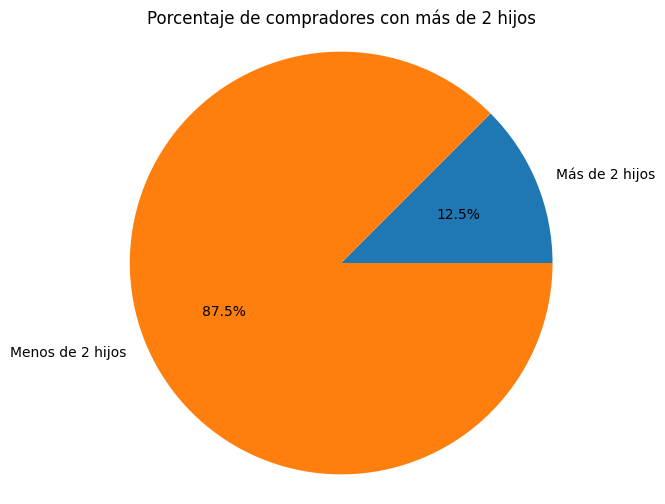

In [6]:
# Gráfico de compradores con más de 2 hijos (Pie chart)
more_than_2_children = df1[df1["Children"] > 2]
percentage_more_than_2_children = (len(more_than_2_children) / len(df1)) * 100
plt.figure(figsize=(6, 6))
labels = ["Más de 2 hijos", "Menos de 2 hijos"]
sizes = [percentage_more_than_2_children, 100 - percentage_more_than_2_children]
plt.pie(sizes, labels=labels, autopct="%.1f%%")
plt.title("Porcentaje de compradores con más de 2 hijos")
plt.axis("equal")

plt.show()

Aqui podemos observar como la mayoria de los compradores tienen menos de 2 hijos.

Pregunta 3: Grupo de edad de los compradores con mayores ingresos y gastos

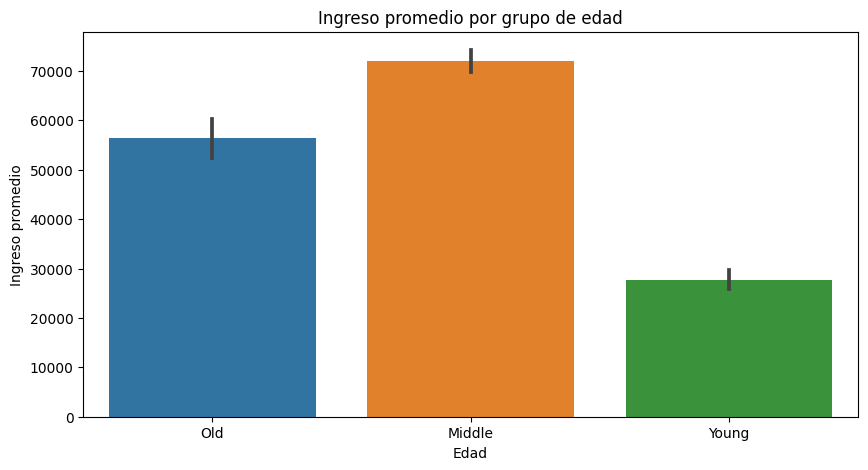

In [7]:
# Gráfico de ingreso promedio por grupo de edad
plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x="Age", y="Salary")
plt.title("Ingreso promedio por grupo de edad")
plt.xlabel("Edad")
plt.ylabel("Ingreso promedio")
plt.show()

El ingreso promedio por grupo de edad mas alto es el de las personas de mediana edad, siendo los jovenes los que tienen un ingreso promedio mas bajo

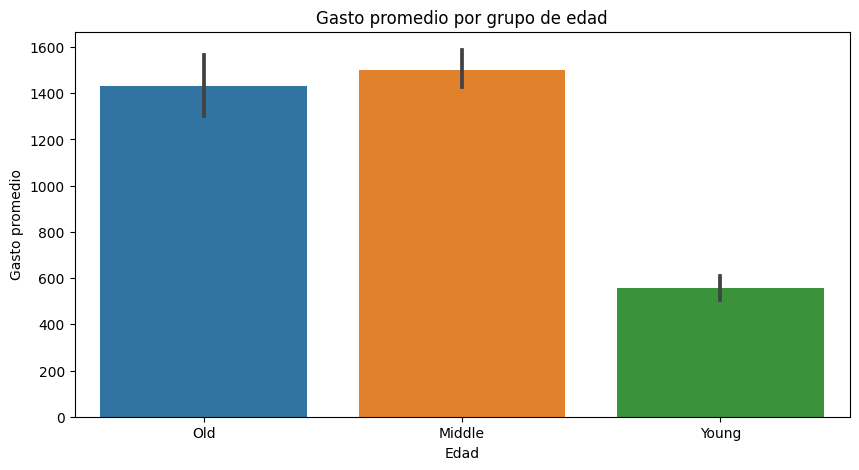

In [8]:
# Gráfico de gasto promedio por grupo de edad
plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x="Age", y="AmountSpent")
plt.title("Gasto promedio por grupo de edad")
plt.xlabel("Edad")
plt.ylabel("Gasto promedio")
plt.show()

El gasto promedio mas alto es igual el de las personas de mediana edad muy cerca de las personas mayores y el menor es el de los jovenes

Pregunta 4: Combinación de edad, género y estado civil que recibió más catálogos

In [25]:
# Grouping the data by age, gender, and marital status and counting the number of catalogs sent
catalog_counts = df1.groupby(["Age", "Gender", "Married"])["Catalogs"].sum().reset_index()

# Finding the combination with the highest number of catalogs
max_catalogs_combination = catalog_counts.loc[catalog_counts["Catalogs"].idxmax()]

# Displaying the combination with the highest number of catalogs
max_catalogs_combination


Age          Middle
Gender         Male
Married     Married
Catalogs       2820
Name: 2, dtype: object

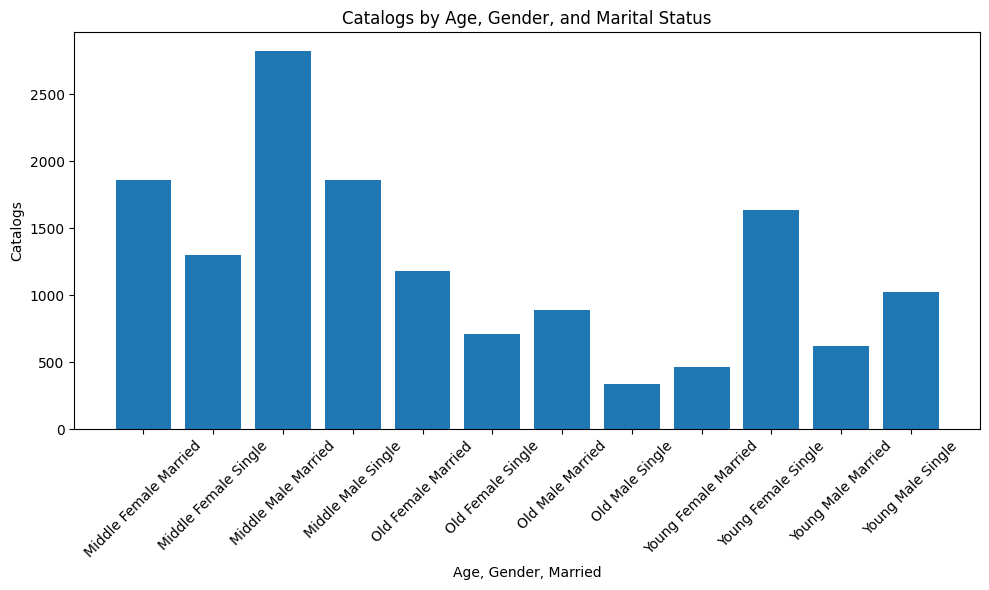

In [26]:
# Combine the columns into a new column
catalog_counts['AgeGenderMarried'] = catalog_counts.apply(lambda x: f"{x['Age']} {x['Gender']} {x['Married']}", axis=1)

# Drop the original columns if needed
df3 = catalog_counts.drop(columns=['Age', 'Gender', 'Married'])
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df3['AgeGenderMarried'], df3['Catalogs'])
plt.xticks(rotation=45)
plt.xlabel('Age, Gender, Married')
plt.ylabel('Catalogs')
plt.title('Catalogs by Age, Gender, and Marital Status')
plt.tight_layout()

# Display the plot
plt.show()


El mayor grupo de personas que reciben mas catalogos son los casados de el genero masculino y los que menos reciben son las personas son las personas mayores y solteras de el genero masculino

Pregunta 5: Proporción de clientes mujeres y hombres con casa propia

<Figure size 600x600 with 0 Axes>

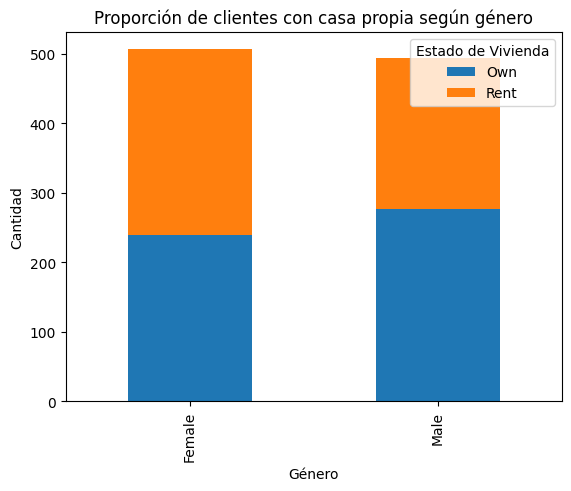

In [10]:
# Gráfico de proporción de clientes mujeres y hombres con casa propia
plt.figure(figsize=(6, 6))
housing_status_gender = df1.groupby(["Gender", "OwnHome"])["Gender"].count().unstack()
housing_status_gender.plot(kind="bar", stacked=True)
plt.title("Proporción de clientes con casa propia según género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Estado de Vivienda")
plt.show()


Hay mas personas de el genero masculino que tienen su propia casa.

Pregunta 6: Personas que más ganan y su proximidad al supermercado

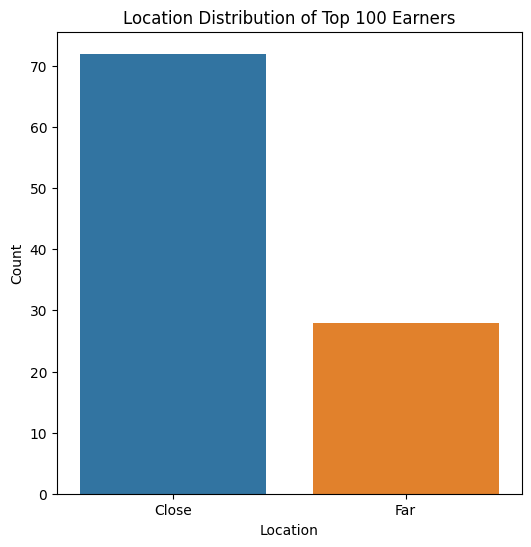

In [11]:
top_100_earners = df1.nlargest(100, "Salary")
# Creating a countplot for the location distribution of the top 100 earners
plt.figure(figsize=(6, 6))
sns.countplot(data=top_100_earners, x="Location", order=["Close", "Far"])
plt.title("Location Distribution of Top 100 Earners")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


La mayoria de las personas con mas ingresos viven cerca de el supermercado

Pregunta 7: Los 10 días de mayor número de transacciones en el supermercado

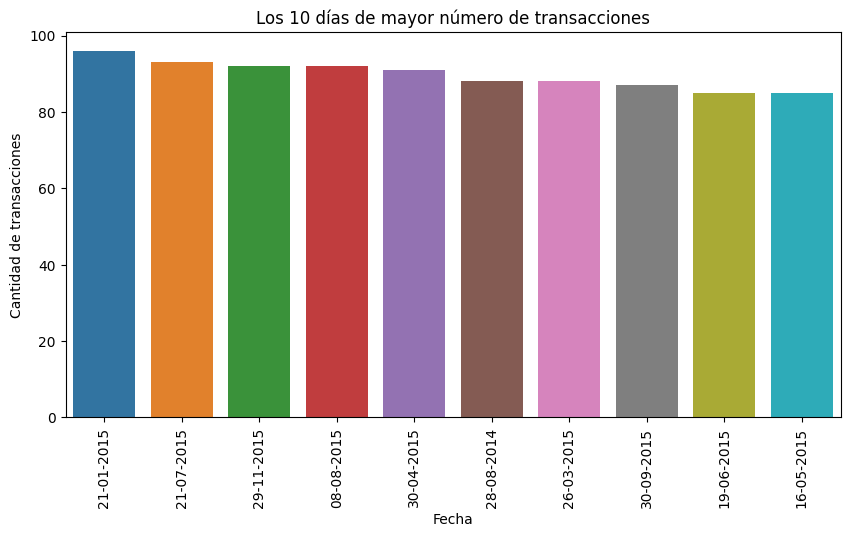

In [12]:
# Gráfico de los 10 días de mayor número de transacciones
top_10_transaction_days = df2["Date"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_transaction_days.index, y=top_10_transaction_days.values)
plt.title("Los 10 días de mayor número de transacciones")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de transacciones")
plt.xticks(rotation=90)
plt.show()


El 21 de enero de el 2015 fue el dia con la mayor cantidad de transacciones

Pregunta 8: Los 10 clientes más frecuentes del supermercado

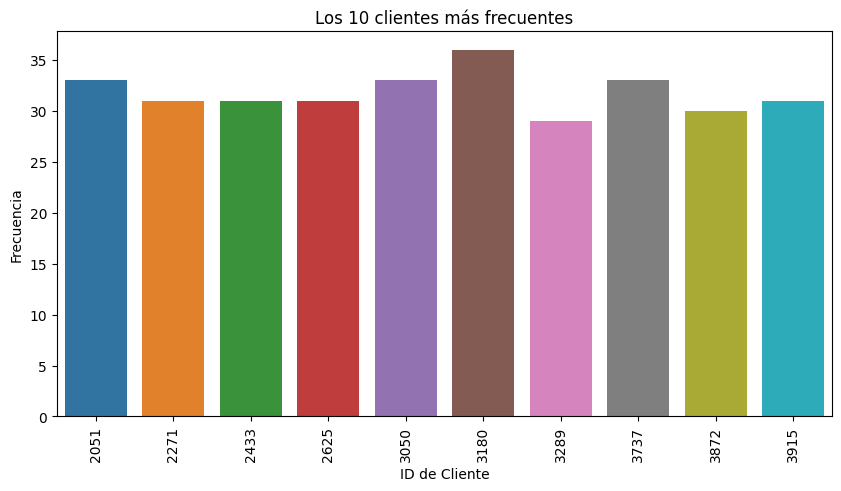

In [13]:
# Gráfico de los 10 clientes más frecuentes
top_10_customers = df2["Member_number"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_customers.index, y=top_10_customers.values)
plt.title("Los 10 clientes más frecuentes")
plt.xlabel("ID de Cliente")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()


El cliente 3180 es el cliente mas frecuente de la tienda

Pregunta 9: Porcentaje de transacciones que incluyen leche, fruta o ambos

In [14]:
# Grouping the data by member and date and counting occurrences
member_date_counts = df2.groupby(["Member_number", "Date", "itemDescription"]).size().reset_index(name="Count")

# Displaying the members with multiple occurrences on the same date
members_with_multiple_occurrences = member_date_counts[member_date_counts["Count"] > 1]

In [15]:
# Grouping the data by member and date, aggregating the item descriptions into a list
basket_data = df2.groupby(['Member_number', 'Date']).agg({'itemDescription': list}).reset_index()


In [16]:

# Create a new DataFrame to store the combined baskets
combined_baskets = pd.DataFrame(columns=["Member_number", "Date", "Basket"])

# Iterate over each row in the basket_data DataFrame
for _, row in basket_data.iterrows():
    member_number = row["Member_number"]
    date = row["Date"]
    basket = " ".join(row["itemDescription"])  # Combine the item descriptions into a single string
    combined_baskets = combined_baskets.append({"Member_number": member_number, "Date": date, "Basket": basket}, ignore_index=True)

# Check if milk, fruit, or both are present in each basket
combined_baskets["Contains_milk"] = combined_baskets["Basket"].str.contains("milk", case=False, na=False)
combined_baskets["Contains_fruit"] = combined_baskets["Basket"].str.contains("fruit", case=False, na=False)
combined_baskets["Contains_both"] = combined_baskets["Basket"].apply(lambda x: "milk" in x.lower() and "fruit" in x.lower())

# Calculate the percentages
percentage_with_milk = (combined_baskets["Contains_milk"].mean()) * 100
percentage_with_fruit = (combined_baskets["Contains_fruit"].mean()) * 100
percentage_with_both = (combined_baskets["Contains_both"].mean()) * 100


C:\Users\blinks\AppData\Local\Temp\ipykernel_5204\606215806.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_baskets = combined_baskets.append({"Member_number": member_number, "Date": date, "Basket": basket}, ignore_index=True)
C:\Users\blinks\AppData\Local\Temp\ipykernel_5204\606215806.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_baskets = combined_baskets.append({"Member_number": member_number, "Date": date, "Basket": basket}, ignore_index=True)
C:\Users\blinks\AppData\Local\Temp\ipykernel_5204\606215806.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_baskets = combined_baskets.append({"Member_number": member_number, "Date": date, "Basket": basket}, ignore_index=True)
C:\Users\blin

In [17]:
# Print the percentages
print("Percentage of baskets with milk: {:.2f}%".format(percentage_with_milk))
print("Percentage of baskets with fruit: {:.2f}%".format(percentage_with_fruit))
print("Percentage of baskets with both milk and fruit: {:.2f}%".format(percentage_with_both))


Percentage of baskets with milk: 19.77%
Percentage of baskets with fruit: 20.18%
Percentage of baskets with both milk and fruit: 3.21%


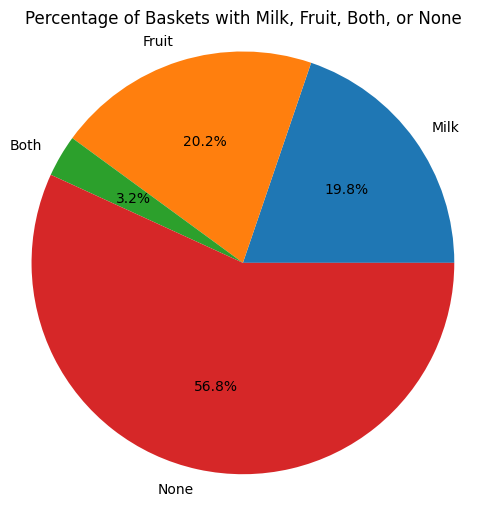

In [18]:
# Calculate the percentage of baskets with none (neither milk nor fruit)
percentage_with_none = 100 - percentage_with_milk - percentage_with_fruit - percentage_with_both

# Pie chart labels and percentages
labels = ["Milk", "Fruit", "Both", "None"]
percentages = [percentage_with_milk, percentage_with_fruit, percentage_with_both, percentage_with_none]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct="%.1f%%")
plt.title("Percentage of Baskets with Milk, Fruit, Both, or None")
plt.axis("equal")

# Display the pie chart
plt.show()

Como podemos observar, aunque muchas personas compran leche, fruta o ambas, es mayor el numero de personas que no compra ninguna.

Pregunta 10: Porcentaje que representa la cantidad gastada con respecto al salario total

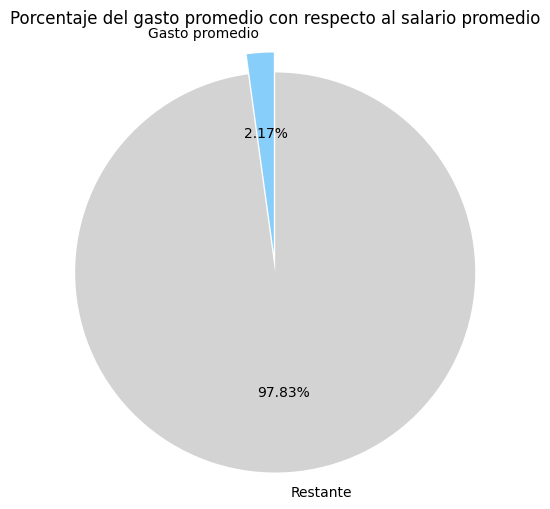

In [19]:

# Calcular el promedio del gasto y del salario
average_spending = df1["AmountSpent"].mean()
average_salary = df1["Salary"].mean()

# Calcular el porcentaje
percentage_spending = (average_spending / average_salary) * 100

# Calcular el porcentaje restante (complemento)
percentage_remaining = 100 - percentage_spending

# Crear el gráfico de pie
labels = ["Gasto promedio", "Restante"]
sizes = [percentage_spending, percentage_remaining]
colors = ["lightskyblue", "lightgray"]
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", startangle=90)
plt.title("Porcentaje del gasto promedio con respecto al salario promedio")
plt.axis("equal") 

plt.show()


Este grafico representa el cuanto se gasta en promedio con respecto al salario promedio de los compradores

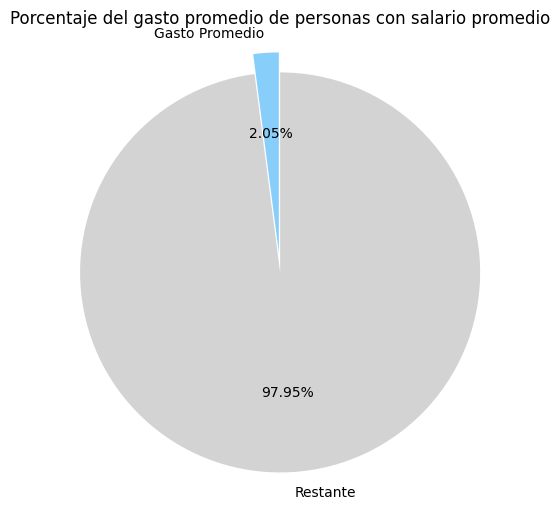

In [20]:

# Calculate the average salary
average_salary = df1["Salary"].mean()

# Define the range for average salary
salary_range = 0.95 * average_salary, 1.05 * average_salary

# Filter the dataframe for individuals within the salary range
average_salary_data = df1[df1["Salary"].between(*salary_range)]

# Calculate the average spending of individuals with average salary
average_spending = average_salary_data["AmountSpent"].mean()

# Calculate the percentage of spending with respect to the average salary
percentage_spending = (average_spending / average_salary) * 100

# Calculate the remaining percentage (complement)
percentage_remaining = 100 - percentage_spending

# Create the pie chart
labels = ["Gasto Promedio", "Restante"]
sizes = [percentage_spending, percentage_remaining]
colors = ["lightskyblue", "lightgray"]
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", startangle=90)
plt.title("Porcentaje del gasto promedio de personas con salario promedio")
plt.axis("equal")

plt.show()


Este grafico representa cuanto es el gasto promedio de una persona con salario promedio.

Conclusiones

En este proyecto, hemos explorado diversos aspectos relacionados con los compradores y su relación con un pequeño supermercado. A través de gráficos y análisis de datos, hemos obtenido información valiosa sobre la demografía de los compradores, sus hábitos de compra y su relación con el supermercado. Estos resultados pueden ayudar al supermercado a comprender mejor a sus clientes y tomar decisiones estratégicas basadas en los patrones identificados.